# Comparing two samples using `stambo`

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Oulu-IMEDS/stambo/main?labpath=notebooks%2FTwo_sample_test.ipynb)

V1.1.3: © Aleksei Tiulpin, PhD, 2025

There are many cases, when we develop models other than classification or regression, and we want to compute scores per datapoint, and then find their mean. We may often want to compare just two samples of measurements, and `stambo` allows to do this easily too.

This example shows how to conduct a simple two-sample test. The example is synthetic, and we will just simply generate two Gaussian samples, and assess whether the mean of the second sample is greater than the mean of the first sample.

## Importing the libraries

In [1]:
import numpy as np
import stambo
import matplotlib.pyplot as plt

SEED=2024

In [2]:
stambo.__version__

'0.1.3'

## Data generation

In [3]:
np.random.seed(SEED)
n_samples = 100
sample_1 = np.random.randn(n_samples)+0.4
sample_2 = np.random.randn(n_samples)+0.7

In [4]:
(sample_2.mean() - sample_1.mean()) / (sample_1 - sample_2).std()

np.float64(0.28044822876192765)

## Sample comparison

Note that when it comes to a two-sample test, `stambo` does not require the statistic of choice to be a machine learning metric that is a subclass of `stambo.metrics.Metric`.

In [5]:
res = stambo.two_sample_test(sample_1, sample_2, statistics={"Mean": lambda x: x.mean()})

Bootstrapping:   0%|          | 0/10000 [00:00<?, ?it/s]

Bootstrapping: 100%|██████████| 10000/10000 [00:00<00:00, 45502.52it/s]


In [6]:
res

{'Mean': array([0.01079892, 0.35458551, 0.08445097, 0.63326529, 0.42991376,
        0.23653763, 0.6256321 , 0.78449927, 0.58650629, 0.98781682])}

## LaTeX report

In [9]:
print(stambo.to_latex(res, m1_name="Sample 1", m2_name="Sample 2"))

% \usepackage{booktabs} <-- do not for get to have this imported. 
\begin{tabular}{ll} \\ 
\toprule 
\textbf{Model} & \textbf{Mean} \\ 
\midrule 
Sample 1 & $0.43$ [$0.24$-$0.63$] \\ 
Sample 2 & $0.78$ [$0.59$-$0.99$] \\ 
\midrule
Effect size & $0.35$ [$0.08$-$0.63]$ \\ 
\midrule
$p$-value & $0.01$ \\ 
\bottomrule
\end{tabular}


## Grouped data

A very common scenario we should consider is when data is grouped. For example, we have multiple datapoints from the same subjects. Below is the simulation code that generates synthetic data for case when we have multiple datapoints from the same subject. 

In [13]:
# Example usage
M = 10  # Number of subjects
N = 50  # Total measurements
dim = 1  # Dimensionality of each measurement

mean_range = np.array((-10, 10))  # Each subject's mean is sampled from this range
base_cov = 0.2 * np.ones((dim, dim)) + 0.8 * np.eye(dim)  # Example structured covariance

res = 0
n_measurements_per_subj = stambo.synthetic.generate_n_measurements(M, N, random=True, d_temp=2)

# How many times to regenerate the dataset
n_samples_cov = 1000
for i in range(n_samples_cov):
    data, subject_ids, means = stambo.synthetic.generate_subject_measurements(n_measurements_per_subj, mean_range, base_cov)
    res += data @ data.T 

res /= n_samples_cov

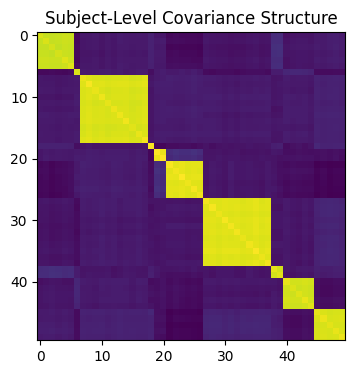

Data for subject 0: 6
Data for subject 1: 1
Data for subject 2: 11
Data for subject 3: 1
Data for subject 4: 2
Data for subject 5: 6
Data for subject 6: 11
Data for subject 7: 2
Data for subject 8: 5
Data for subject 9: 5


In [14]:
plt.figure(figsize=(4, 4))
plt.imshow(res)
plt.title("Subject-Level Covariance Structure")
plt.show()

for s_id in range(M):
    n_per_i = data[subject_ids == s_id].shape[0]
    print(f"Data for subject {s_id}: {n_per_i}")